In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from math import ceil

In [2]:
plt.style.use('Solarize_Light2')
#plt.style.use('dark_background')
#plt.style.use('classic')
#plt.style.use('seaborn')
#plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-white')
#plt.style.use('fivethirtyeight')

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(url,error_bad_lines=False)

In [4]:
covid_confirmados = covid.drop(columns= ['Province/State','Lat','Long'])
covid_confirmados = covid_confirmados.groupby(['Country/Region']).sum()
covid_confirmados

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


In [17]:
mexico = covid_confirmados.loc['Mexico']
mexico

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/26/20    14677
4/27/20    15529
4/28/20    16752
4/29/20    17799
4/30/20    19224
Name: Mexico, Length: 100, dtype: int64

In [21]:
# Adicional el valor de hoy
mexico['5/1/20'] = 20739
mexico

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/27/20    15529
4/28/20    16752
4/29/20    17799
4/30/20    19224
5/1/20     20739
Name: Mexico, Length: 101, dtype: int64

In [37]:
len_mex = len(mexico)

In [45]:
E = [0]
[E.append(mexico[i+1] - mexico[i]) for i in range(len_mex-1)]
E = pd.Series(E, index=mexico.index)
E

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
4/27/20     852
4/28/20    1223
4/29/20    1047
4/30/20    1425
5/1/20     1515
Length: 101, dtype: int64

In [22]:
for p in covid_confirmados.index:
    print(p, end='\t')

Afghanistan	Albania	Algeria	Andorra	Angola	Antigua and Barbuda	Argentina	Armenia	Australia	Austria	Azerbaijan	Bahamas	Bahrain	Bangladesh	Barbados	Belarus	Belgium	Belize	Benin	Bhutan	Bolivia	Bosnia and Herzegovina	Botswana	Brazil	Brunei	Bulgaria	Burkina Faso	Burma	Burundi	Cabo Verde	Cambodia	Cameroon	Canada	Central African Republic	Chad	Chile	China	Colombia	Comoros	Congo (Brazzaville)	Congo (Kinshasa)	Costa Rica	Cote d'Ivoire	Croatia	Cuba	Cyprus	Czechia	Denmark	Diamond Princess	Djibouti	Dominica	Dominican Republic	Ecuador	Egypt	El Salvador	Equatorial Guinea	Eritrea	Estonia	Eswatini	Ethiopia	Fiji	Finland	France	Gabon	Gambia	Georgia	Germany	Ghana	Greece	Grenada	Guatemala	Guinea	Guinea-Bissau	Guyana	Haiti	Holy See	Honduras	Hungary	Iceland	India	Indonesia	Iran	Iraq	Ireland	Israel	Italy	Jamaica	Japan	Jordan	Kazakhstan	Kenya	Korea, South	Kosovo	Kuwait	Kyrgyzstan	Laos	Latvia	Lebanon	Liberia	Libya	Liechtenstein	Lithuania	Luxembourg	MS Zaandam	Madagascar	Malawi	Malaysia	Maldives	Mali	Malta	Mauri

In [7]:
fuente = 'fuente: https://github.com/CSSEGISandData/COVID-19.git'

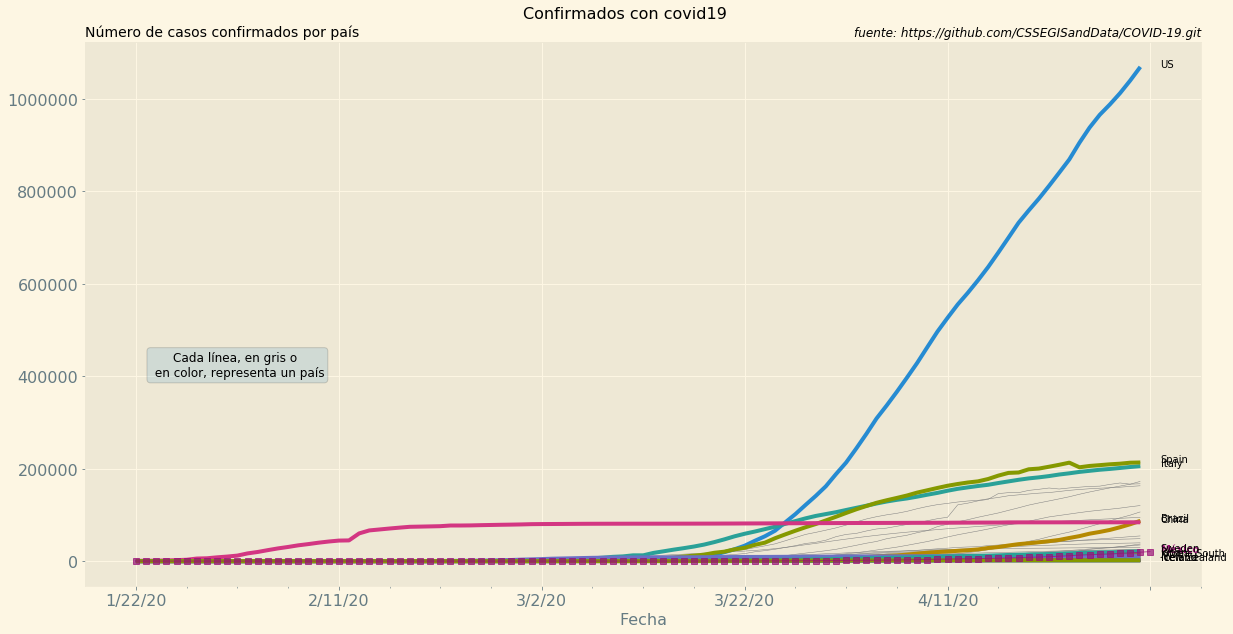

In [167]:
par = {'legend':False, 'figsize':(20,10), 'logy':True, 
       'color':'gray', 'lw':0.5, 'ls':'-', 'grid':False}
covid_confirmados.transpose().plot(**par)

paises = ['US', 'Italy', 'Spain', 'Brazil', 'Japan', 'Iceland', 'China', 'Korea, South', 'New Zealand', 'Sweden', 'Iceland']

xtext = len(mexico)
col_mex='#991177'
par_mex = {'lw':1.0, 'ls':'-', 'marker':'s', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = mexico.plot(**par_mex)
plt.text(xtext, covid_confirmados.loc['Mexico'][-1], 'México', weight='bold', color=col_mex)

for p in paises:
    par_pais = {'lw':4, 'marker':'', 'label':p}
    covid_confirmados.loc[p].plot(**par_pais)
    plt.text(xtext, covid_confirmados.loc[p][-1], p)#, color=linea[0].get_color())

plt.suptitle('Confirmados con covid19', y = 0.93, fontsize=16)
plt.title('Número de casos confirmados por país', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)
texto='Cada línea, en gris o \n en color, representa un país'
plt.text(10, 400000, texto, ha='center', fontsize=12,
        bbox=dict(boxstyle='round', alpha=0.15))#, linewidth=0.75))
plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.minorticks_on()
plt.yscale('linear')
plt.savefig('covid19.pdf')

In [ ]:
# Usaremos en este caso la función curve_fit.
from scipy.optimize import curve_fit

# La función que queremos ajustar: exponencial creciente.
def func(x, a, b, c):
    return a * np.exp(a * x + b) + c

In [173]:
xd = [x for x in range(len(mexico))]
# Con las listas xdata y ydata ya podemos hacer el ajuste
popt, pcov = curve_fit(func, xd , mexico.values)
perr = np.sqrt(np.diag(pcov))
x = np.arange(0,150,1)
y = func(np.array(x), *popt)
#plt.plot(xd,mexico.values, '.')
#plt.plot(x,y)

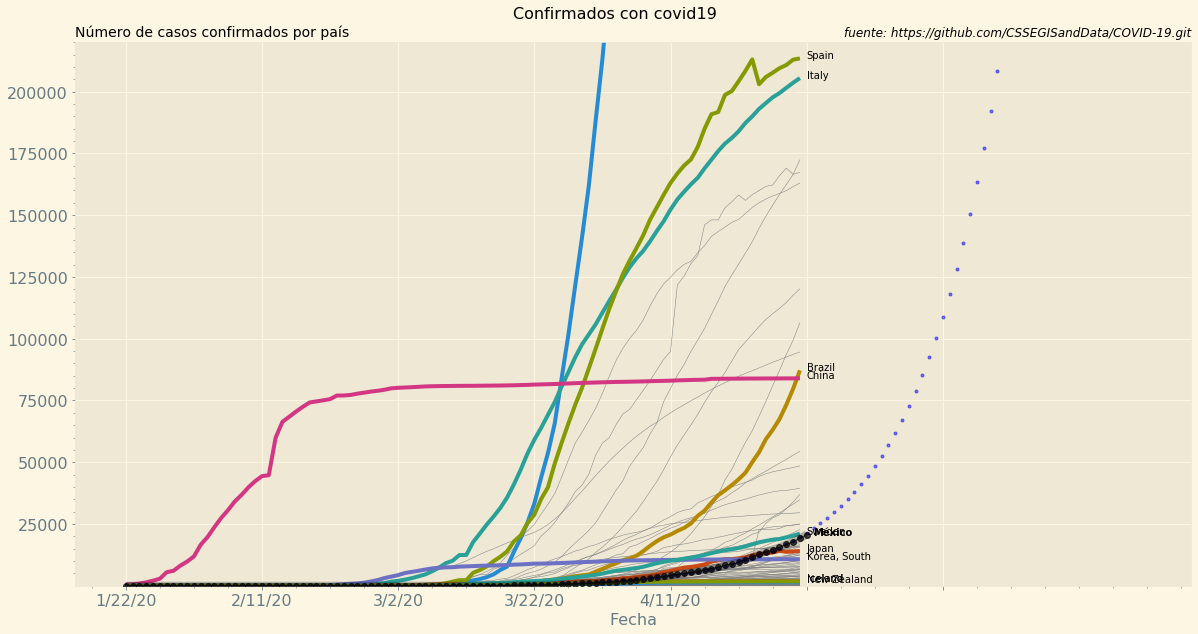

In [180]:
par = {'legend':False, 'figsize':(20,10), 'logy':False, 
       'color':'gray', 'lw':0.5, 'ls':'-', 'grid':False}
covid_confirmados.transpose().plot(**par)
thr = -1
xtext = len(mexico[mexico > thr])
col_mex='#991177'
col_mex='black'
par_mex = {'lw':1.0, 'ls':'-', 'marker':'o', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = mexico[mexico > thr].plot(**par_mex)
par_mex_glow = {'lw':8.0, 'ls':'-', 'marker':'', 'color':col_mex, 'alpha':0.25, 'zorder':100}
mexico[mexico > thr].plot(**par_mex_glow)
plt.text(xtext, mexico[-1], 'México', weight='bold', color=col_mex)

for p in paises:
    pais_x = covid_confirmados.loc[p]
    par_pais = {'lw':4, 'marker':'', 'label':p}
    pais_x[pais_x > thr].plot(**par_pais)
    if p != 'US':# and p != 'Italy' and p != 'Spain' and p != 'Brazil' and p != 'China':
        xtext = len(pais_x[pais_x > thr])
        plt.text(xtext, covid_confirmados.loc[p][-1], p)#, color=linea[0].get_color())

plt.suptitle('Confirmados con covid19', y = 0.93, fontsize=16)
plt.title('Número de casos confirmados por país', loc='left', fontsize=14)
plt.title(fuente, loc='right', fontstyle='italic', fontsize=12)
texto='Cada línea, en gris o \n en color, representa un país'
#plt.text(10, 85000, texto, ha='center', fontsize=12,
#        bbox=dict(boxstyle='round', alpha=0.15))#, linewidth=0.75))
plt.xlabel('Fecha', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(1,220000)
#plt.yscale('log')
plt.plot(x,y, 'b.', lw=4.0, alpha=0.5)

plt.minorticks_on()
plt.savefig('covid19_x.pdf')

(0, 111.10000000000001)

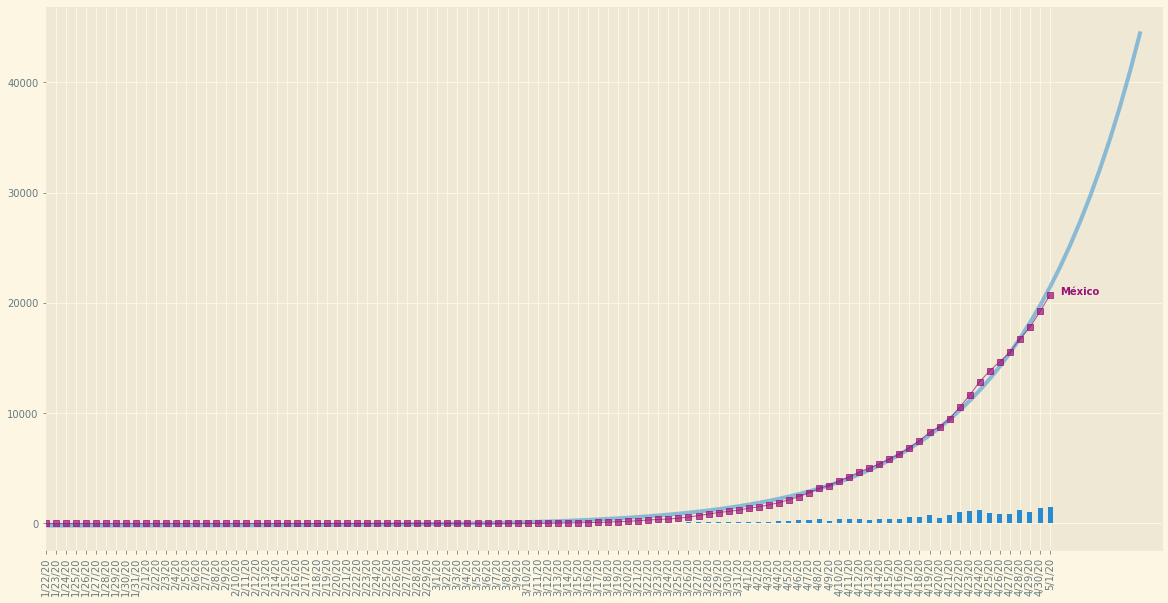

In [154]:
xtext = len(mexico)
col_mex='#991177'
par_mex = {'figsize':(20,10),'lw':1.0, 'ls':'-', 'marker':'s', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = mexico.plot(**par_mex)
barras = E.plot(kind='bar')
plt.text(xtext, mexico[-1], 'México', weight='bold', color=col_mex)
plt.plot(x,y, lw=4.0, alpha=0.5)
plt.xlim(0,xtext * 1.10)
#plt.yscale('log')

In [61]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
dcovid = pd.read_csv(url,error_bad_lines=False)
dcovid.drop(columns= ['Province/State','Lat','Long'], inplace=True)
dcovid = dcovid.groupby(['Country/Region']).sum()
dcovid

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [62]:
dmexico = dcovid.loc['Mexico']
dmexico

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
4/26/20    1351
4/27/20    1434
4/28/20    1569
4/29/20    1732
4/30/20    1859
Name: Mexico, Length: 100, dtype: int64

In [63]:
# Adicional el valor de hoy
dmexico['5/1/20'] = 1972
dmexico

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
4/27/20    1434
4/28/20    1569
4/29/20    1732
4/30/20    1859
5/1/20     1972
Name: Mexico, Length: 101, dtype: int64

In [66]:
len_dmex = len(dmexico)
DE = [0]
[DE.append(dmexico[i+1] - dmexico[i]) for i in range(len_dmex-1)]
DE = pd.Series(DE, index=dmexico.index)
DE

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
4/27/20     83
4/28/20    135
4/29/20    163
4/30/20    127
5/1/20     113
Length: 101, dtype: int64

[  0.09515413   0.50064349 -19.45757005]


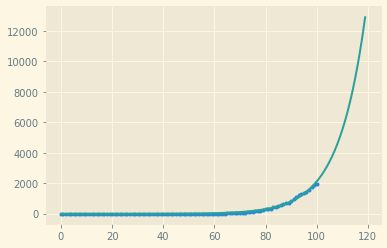

In [142]:
# Usaremos en este caso la función curve_fit.
from scipy.optimize import curve_fit

# La función que queremos ajustar: exponencial creciente.
def func(x, a, b, c):
    return a * np.exp(a * x + b) + c

xd = [x for x in range(len(dmexico))]
# Con las listas xdata y ydata ya podemos hacer el ajuste
popt, pcov = curve_fit(func, xd , dmexico.values)
perr = np.sqrt(np.diag(pcov))

print(popt)
x = np.arange(0,120,1)
y = func(np.array(x), *popt)
plt.plot(xd,dmexico.values, '.')
plt.plot(x,y)
#dmexico_fit = pd.Series(y, index = dmexico.index) 

(0, 111.10000000000001)

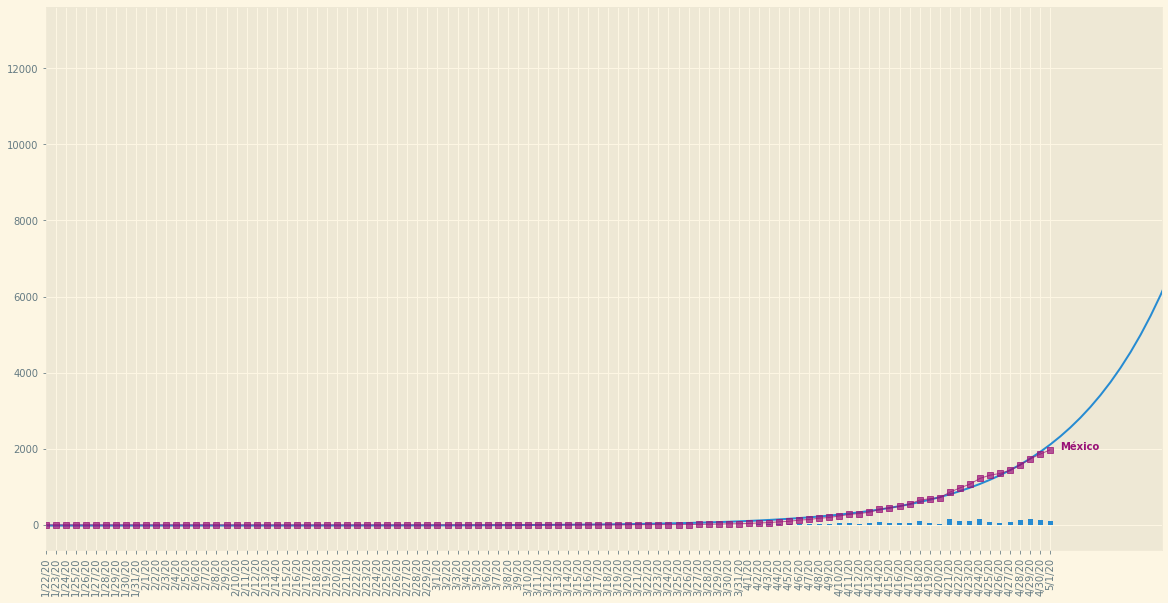

In [143]:
xtext = len(dmexico)
col_mex='#991177'
par_mex = {'figsize':(20,10),'lw':1.0, 'ls':'-', 'marker':'s', 'label':'México', 'color':col_mex, 'alpha':0.7, 'zorder':100}
linea = dmexico.plot(**par_mex)
barras = DE.plot(kind='bar')
plt.text(xtext, dmexico[-1], 'México', weight='bold', color=col_mex)
plt.plot(x,y)
plt.xlim(0,xtext*1.10)
#plt.yscale('log')